Process RTS sample scenarios to understand input-output relationship between RTS scenarios and Vatic outputs:
(i) total daily system costs; (ii) lost load; (iii) renewable curtailment. The aggregated solar, wind, load assets are considered below.

In [1]:
import pandas as pd
import bz2
import dill as pickle
import pandas as pd
import csv
import matplotlib.pyplot as plt
from numpy import mean
import numpy as np
import math

In [2]:
def plotScens(xTime, yScens,yFrcst,yMean, ax=None, legend=0, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        
    ci9 = np.quantile(yScens, 0.9, axis=0)
    ci975 = np.quantile(yScens, 0.975, axis=0)
    ci995 = np.quantile(yScens, 0.995, axis=0)
    ciMax = np.max(yScens,axis=0)
    ci1 = np.quantile(yScens, 0.1, axis=0)
    ci025 = np.quantile(yScens, 0.025, axis=0)
    ci005 = np.quantile(yScens, 0.005, axis=0)
    ciMin = np.min(yScens, axis=0)
    ax.fill_between(xTime, ci005, ci995, color='gray', alpha=.15)
    ax.fill_between(xTime, ci025, ci975, color='b', alpha=.2, label=r'CI $95\%$')
    ax.fill_between(xTime, ci1, ci9, color='b', alpha=.2)
    ax.fill_between(xTime, ciMin, ciMax,color='gray',alpha=0.07)
    ax.plot(xTime,yFrcst,'-o',color='darkorange',linewidth=2,markersize=8,label='Forecast')
    ax.plot(xTime, yMean,'--b', label='Mean')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='12', horizontalalignment='right') 
    if legend > 0:
        ax.legend(fontsize=12)
    #ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

In [3]:
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
Forecast = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\Forecast.csv")
WindForecast=Forecast['WindForecast']
SolarForecast=Forecast['SolarForecast']
LoadForecast=Forecast['LoadForecast']

Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\Mean.csv")
WindMean=Mean['WindMean']
SolarMean=Mean['SolarMean']
LoadMean=Mean['LoadMean']
time= Mean['time']
#print(WindMean)
WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\WindScenariosAggregated.csv")
SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\SolarScenariosAggregated.csv")
LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\LoadScenariosAggregated.csv")
VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\VaticOutput.csv")
LoadShedHour = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData1\\LoadShedHour.csv")

In [6]:
from GenCostIntegrationScenario2 import *
from LoadShedHourly import *
def Ploting(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, VaticOutput, LoadShedHour):
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Wind Scenarios",fontsize=15)
    ax = plotScens(time, WindScenarios,WindForecast,WindMean, ax=ax)
    plt.grid(linewidth=0.25)
    ax.tick_params(labelsize=15)

    #plt.plot( WindScenarios.T,'gray')
    #plt.plot(time,WindForecast,'green')
    #plt.plot(time, WindMean,'r')
    plt.xticks([0,6,12,18,24], ('0', '6', '12', '18', '24'), fontsize='11', horizontalalignment='right')
    plt.show
    plt.grid()
    ax.tick_params(labelsize=15)

    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Solar Scenarios",fontsize=15)
    ax = plotScens(time, SolarScenarios,SolarForecast,SolarMean, ax=ax)

    plt.grid(linewidth=0.25)
    ax.tick_params(labelsize=15)

    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Load Scenarios",fontsize=15)
    #plt.plot(LoadScenarios.T,'gray')
    ci95 = np.quantile(LoadScenarios, 0.95, axis=0)
    ci99 = np.quantile(LoadScenarios, 0.99, axis=0)
    ci1 = np.quantile(LoadScenarios, 0.01, axis=0)
    ci5 = np.quantile(LoadScenarios, 0.05, axis=0)
    ax.fill_between(time, ci1, ci99, color='b', alpha=.1)
    ax.fill_between(time, ci5, ci95, color='b', alpha=.2)
    ax = plotScens(time, LoadScenarios,LoadForecast,LoadMean, ax=ax)
    #plt.plot(time,LoadForecast,'-o',color='green',linewidth=2,markersize=10)
    #plt.plot(time, LoadMean,'--rx')
    plt.xticks([0,6,12,18,24], ('0', '6', '12', '18', '24'), fontsize='11', horizontalalignment='right')
    plt.show
    #plt.grid()
    ax.tick_params(labelsize=15)

    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    #print(GenerationCost)
    #print(np.fromiter(GenerationCost, dtype=int))
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Generation Cost",fontsize=15)
    ax.hist(GenerationCostAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Load Shedding",fontsize=15)
    ax.hist(LoadSheddingAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Renewable Curtailment",fontsize=15)
    ax.hist(RenewableCurtailmentAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
    #ax.tick_params(labelsize=15)
    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    HighGenCost, IntegrationScen=GenCostIntegrationScen2(DifferenceLoadWindSolar, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)
    DifferenceLoadWindSolar=WindScenarios
    HighGenCost, IntegrationScen=GenCostIntegrationScen2(DifferenceLoadWindSolar, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)
    DifferenceLoadWindSolar=SolarScenarios
    HighGenCost, IntegrationScen=GenCostIntegrationScen2(DifferenceLoadWindSolar, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time)

    hours=LoadShedHour['hours']
    LoadShed=LoadShedHour['LoadShed']
    LoadShedHours(hours, LoadShed)

The indices of the scenarios which are always above the mean of the scenarios [12, 230, 319, 342, 539, 587, 905]
63673.651625499995
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean


C:\Users\Mahashweta Patra\GenCostIntegrationScenario2.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)


The indices of the scenarios which are always above the mean of the scenarios [564]
18611.103845999998
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean
The indices of the scenarios which are always above the mean of the scenarios []
9162.710387499998
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean
(array([], dtype=int64),)
[65, 40, 28, 39, 68, 200, 449, 50, 1, 0, 0, 0, 0, 0, 1, 5, 0, 59, 247, 29, 0, 0, 0, 0]


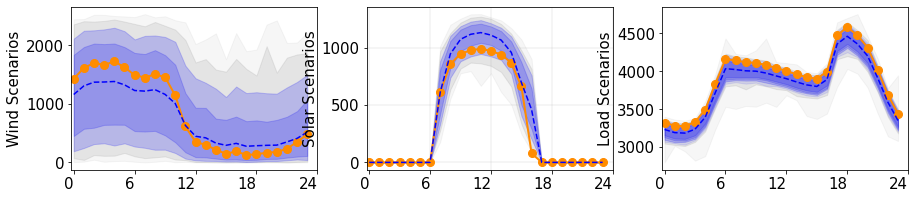

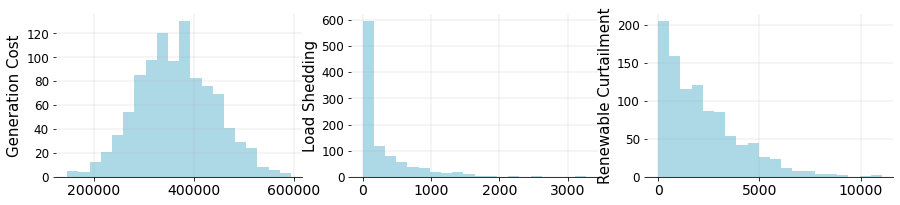

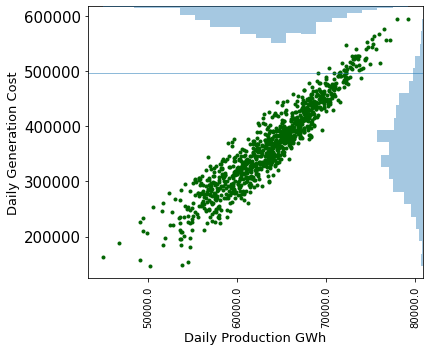

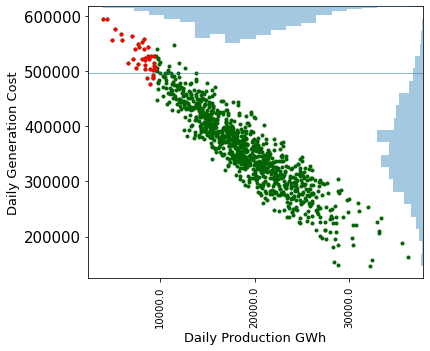

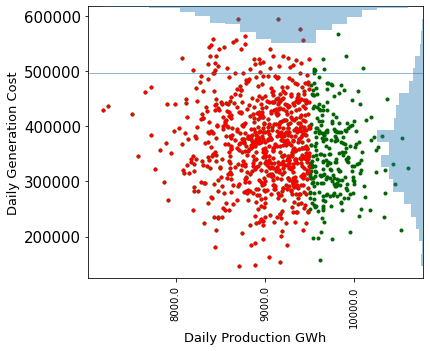

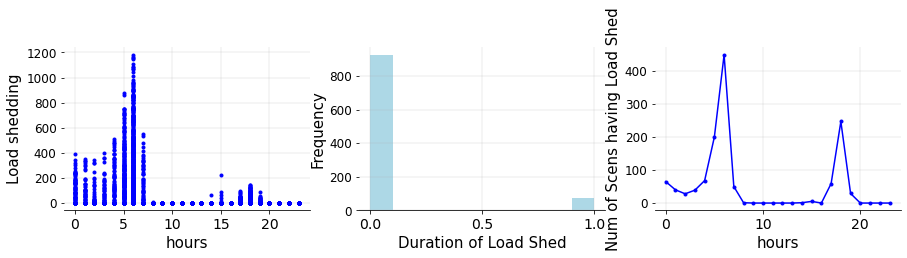

In [7]:
#from PlotingFunction import *
Ploting(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, VaticOutput, LoadShedHour)

The indices of the scenarios which are always above the mean of the scenarios [10, 99, 156, 634, 655, 700, 846, 910]
58009.53733880001
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean


C:\Users\Mahashweta Patra\GenCostIntegrationScenario2.py:138: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)


The indices of the scenarios which are always above the mean of the scenarios [389, 794]
17786.862796200003
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean
The indices of the scenarios which are always above the mean of the scenarios []
11146.647932400005
The number of scenarios for which the integration sum over 24 hrs are bigger than the integration sum for the mean
(array([], dtype=int64),)
[184, 119, 34, 5, 34, 77, 20, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]


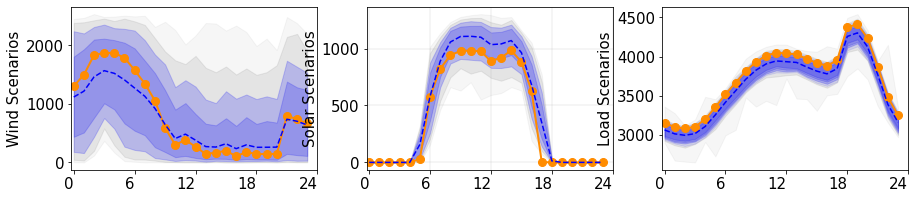

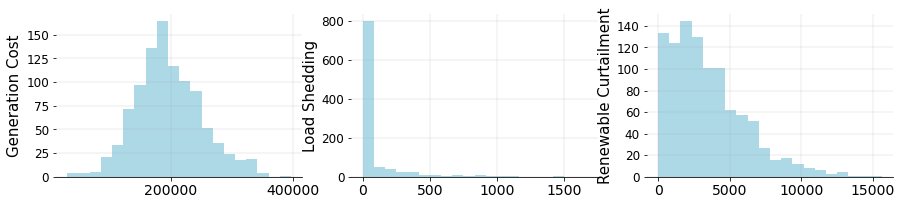

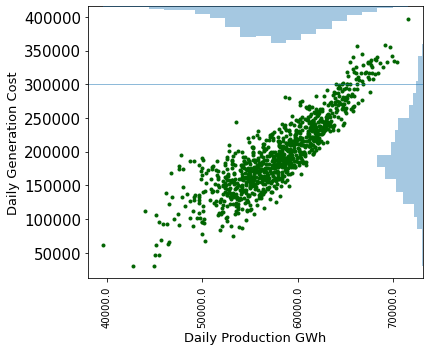

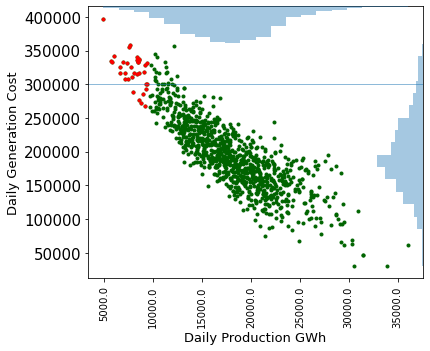

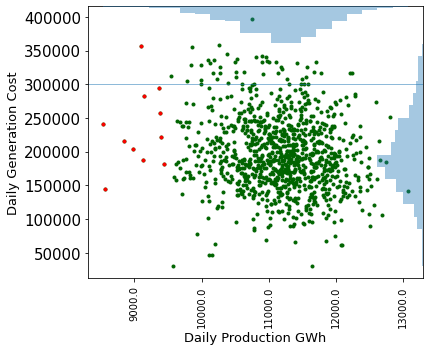

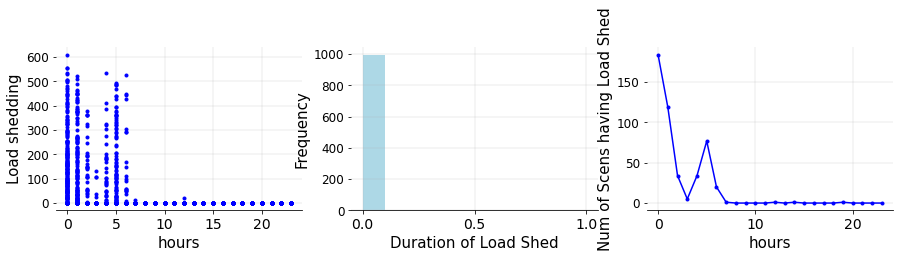

In [9]:
pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
Forecast = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\Forecast.csv")
WindForecast=Forecast['WindForecast']
SolarForecast=Forecast['SolarForecast']
LoadForecast=Forecast['LoadForecast']

Mean = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\Mean.csv")
WindMean=Mean['WindMean']
SolarMean=Mean['SolarMean']
LoadMean=Mean['LoadMean']
time= Mean['time']
#print(WindMean)
WindScenarios = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\WindScenariosAggregated.csv")
SolarScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\SolarScenariosAggregated.csv")
LoadScenarios=pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\LoadScenariosAggregated.csv")
VaticOutput = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\VaticOutput.csv")
LoadShedHour = pd.read_csv("C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedData\\LoadShedHour.csv")
Ploting(time, WindScenarios,WindForecast,WindMean,SolarScenarios,SolarForecast,SolarMean, LoadScenarios,LoadForecast,LoadMean, VaticOutput, LoadShedHour)

We consider all load, solar and wind to be stochastic and in that case we try to understand the relationship between the scenarios and the vatic output. The scenario causing the high generation cost, for them the integration of energy generation over 24 hrs are high and above the thresold value. We consider only those scenario which has a rapid jump in energy generation from 16th hour to 17th hour. This rapid jump in energy causes the higher generation cost. The scenarios that causes the highest 5% generation cost does not have any connection with the Load shedding or the renewable curtailment though. We consider those scenarios whose integration value is high (higher than some thresold value)